In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/demo-knes381/subject_1321.xlsx
/kaggle/input/demo-knes381/subject_1432.xlsx
/kaggle/input/demo-knes381/subject_1321.csv
/kaggle/input/demo-knes381/subject_1232.csv
/kaggle/input/demo-knes381/VO2_CSV.csv
/kaggle/input/demo-knes381/subject_1232.xlsx
/kaggle/input/demo-knes381/subject_1432.csv
/kaggle/input/demo-knes381/subject_1523.csv
/kaggle/input/demo-knes381/VO2_excel.xlsx
/kaggle/input/demo-knes381/subject_1523.xlsx


In [2]:
# df_excel = pd.read_excel("/kaggle/input/demo-knes381/VO2_excel.xlsx") will read the excel version of this file

df = pd.read_csv('../input/demo-knes381/subject_1432.csv')
df.info()
df.head(5)
# this function will throw errors when if finds values that are blank NaN (not a number)
# you can ignore this we will fix it momentarily...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    61 non-null     object 
 1   VO2     62 non-null     object 
 2   VO2/kg  62 non-null     object 
 3   METS    60 non-null     float64
 4   VCO2    62 non-null     object 
 5   VE      62 non-null     object 
 6   RER     60 non-null     float64
 7   RR      61 non-null     object 
 8   Vt      62 non-null     object 
 9   FEO2    61 non-null     object 
 10  FECO2   61 non-null     object 
 11  HR      61 non-null     object 
 12  VE/     62 non-null     object 
 13  VE/.1   62 non-null     object 
 14  PetCO2  61 non-null     object 
dtypes: float64(2), object(13)
memory usage: 7.5+ KB


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,TIME,VO2,VO2/kg,METS,VCO2,VE,RER,RR,Vt,FEO2,FECO2,HR,VE/,VE/.1,PetCO2
0,NaN,STPD,STPD,NaN,STPD,BTPS,NaN,NaN,BTPS,NaN,NaN,NaN,VO2,VCO2,NaN
1,min,L/min,ml/kg/m,NaN,L/min,L/min,NaN,BPM,L,%,%,bpm,BT/ST,BT/ST,mmHg
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.534000039,1.031499386,13.84562969,3.955894,0.921027899,32.77013397,0.892902,24.34456825,1.346096277,16.59932327,3.995723009,82,31.76941681,35.57995987,27.01317215
4,1.031666636,1.078813553,14.48071861,4.137348,0.941370487,32.80964661,0.872598,22.10314941,1.484387875,16.42579842,4.078265667,36,30.4127121,34.85306549,27.12163162


In [3]:
# Step 1: read in the dataframe and do not allow pandas to find the header.
# Please note that I am creating a new dataframe here df2 so we can compare
# df and df2 potentially in the future...

df2 = pd.read_csv('../input/demo-knes381/subject_1432.csv', header=None)
# Assuming the first row is the header and the third row contains units. please note that in the raw file if the header is the fist row it will be zero, 
# and the third row will be 2 as we start counting at zero instead of 1.

# Step 2: Set the header.

header = df2.iloc[0]
units = df2.iloc[2]

# Step 3: Combine header and units, replace NaN with blank.
new_header = [f"{h} ({u})" if not pd.isna(u) else f"{h}" for h, u in zip(header, units)]
# Reading from the back... zip (hader, units) pairs each element from the header with a unit
# If 'u' is valid it creates a string value formatted as header (unit)
# using f-string f"{h} ({u})", if u is NaN (not a number) it simply used the header h as the string f"{h}"
# the list of these formatings is then written into new_header

# Step 4: Reassign column names and drop extra rows.
df2.columns = new_header
df2 = df2.drop(index=[0, 1, 2, 3])

# Optionally, reset index if you want a clean, zero-based index.
df2.reset_index(drop=True, inplace=True)
df2.head()

,TIME (min),VO2 (L/min),VO2/kg (ml/kg/m),METS,VCO2 (L/min),VE (L/min),RER,RR (BPM),Vt (L),FEO2 (%),FECO2 (%),HR (bpm),VE/ (BT/ST),VE/ (BT/ST),PetCO2 (mmHg)
0,0.534000039,1.031499386,13.84562969,3.955894232,0.921027899,32.77013397,0.892902017,24.34456825,1.346096277,16.59932327,3.995723009,82,31.76941681,35.57995987,27.01317215
1,1.031666636,1.078813553,14.48071861,4.137348175,0.941370487,32.80964661,0.872597933,22.10314941,1.484387875,16.42579842,4.078265667,36,30.4127121,34.85306549,27.12163162
2,1.521333337,0.999064684,13.41026402,3.831504107,0.884314001,29.55063248,0.885141909,18.37985039,1.607773304,16.28624344,4.251848698,56,29.57829666,33.41644669,28.35643578
3,2.003166676,1.156774282,15.52717113,4.43633461,0.995852172,32.44647217,0.86088717,18.67865944,1.737087846,16.05854034,4.359823227,27,28.04909515,32.58161545,29.16718483
4,2.507666588,1.121407986,15.0524559,4.300701618,0.962487578,31.22615242,0.85828495,15.8572855,1.969199061,16.02567291,4.37826252,27,27.84548759,32.44317627,29.20425415


In [4]:
df2.tail()

,TIME (min),VO2 (L/min),VO2/kg (ml/kg/m),METS,VCO2 (L/min),VE (L/min),RER,RR (BPM),Vt (L),FEO2 (%),FECO2 (%),HR (bpm),VE/ (BT/ST),VE/ (BT/ST),PetCO2 (mmHg)
55,28.00416565,3.605244875,48.39254761,13.82644176,3.878199339,133.9531097,1.075710416,34.69387436,3.86100173,17.08212471,4.114511967,176,37.15506744,34.54002762,27.41787148
56,28.50432968,3.645794868,48.93684387,13.98195553,3.977361679,143.4989471,1.090945005,37.98733521,3.777547121,17.28629875,3.940698624,180,39.3601265,36.0789299,26.07777214
57,29.00016212,3.718159437,49.90818024,14.25948048,4.076729774,148.0584259,1.096437573,38.31932831,3.863805294,17.32434273,3.915020466,182,39.82035446,36.31793976,26.00835037
58,29.50366783,3.696777582,49.62117386,14.17747784,4.088238239,153.9693298,1.10589242,41.70804596,3.6915977,17.47602081,3.776765585,185,41.6496048,37.66153717,25.00949669
59,29.7745018,2.708231688,36.35210419,10.38631535,3.028991699,116.847702,1.118438959,40.61538696,2.876931906,17.58719826,3.688127518,171,43.14538574,38.57643509,24.47012711


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TIME (min)        60 non-null     object
 1   VO2 (L/min)       60 non-null     object
 2   VO2/kg (ml/kg/m)  60 non-null     object
 3   METS              60 non-null     object
 4   VCO2 (L/min)      60 non-null     object
 5   VE (L/min)        60 non-null     object
 6   RER               60 non-null     object
 7   RR (BPM)          60 non-null     object
 8   Vt (L)            60 non-null     object
 9   FEO2 (%)          60 non-null     object
 10  FECO2 (%)         60 non-null     object
 11  HR (bpm)          60 non-null     object
 12  VE/ (BT/ST)       60 non-null     object
 13  VE/ (BT/ST)       60 non-null     object
 14  PetCO2 (mmHg)     60 non-null     object
dtypes: object(15)
memory usage: 7.2+ KB


In [6]:
print(df['TIME'].describe())  # I put the df[`TIME`]... in a print statment so that we see the results of both commands, it is not normally necessary
# otherwise it would overwrite the first df[`TIME`] with the results of the second call below so fast you wont see it.

df2['TIME (min)'].describe()

# that said if you type df2[''] when you cursor is between the two quote hit tab and all the names for the columns will appear as option
# also note that in our first dataframe as we have 57 values the first value in the column `top`is "min"  whereas in df2 the `top` value is .0517...
# in both cases the descriptive statistics are poor as pythons sees this value as an object and not a float or intiger

count      61
unique     61
top       min
freq        1
Name: TIME, dtype: object


count              60
unique             60
top       0.534000039
freq                1
Name: TIME (min), dtype: object

In [7]:
# Please note we are redefining the dataframe df here all previous edits and changes will be lost when we run this command.
# As we import the data we tell the program that the header is found in row zero and to skip the next three rows

df = pd.read_csv('../input/demo-knes381/subject_1432.csv', header=[0], skiprows=[1,2,3])
# again we won't see anything happen here when this runs but the value should increment [17]...

In [8]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    60 non-null     float64
 1   VO2     60 non-null     float64
 2   VO2/kg  60 non-null     float64
 3   METS    60 non-null     float64
 4   VCO2    60 non-null     float64
 5   VE      60 non-null     float64
 6   RER     60 non-null     float64
 7   RR      60 non-null     float64
 8   Vt      60 non-null     float64
 9   FEO2    60 non-null     float64
 10  FECO2   60 non-null     float64
 11  HR      60 non-null     float64
 12  VE/     60 non-null     float64
 13  VE/.1   60 non-null     float64
 14  PetCO2  60 non-null     float64
dtypes: float64(15)
memory usage: 7.2 KB


In [9]:
round(df['TIME'].std(), 3)
 # this will print the standard deviation of the "TIME" column to 3 decimal places

8.725

In [10]:
# the convention for this is df.rename(columns={'old_name1': 'new_name1', 'old_name2': 'new_name2', 'old_name3': 'new_name3'})
df = df.rename(columns={'VE/': 'VE/VO2', 'VE/.1': 'VE/VCO2'})
# if we wanted to we could add the units as we did before here df.rename(columns={'old_name' : 'new_name(unit)'})

In [11]:
df.head()

,TIME,VO2,VO2/kg,METS,VCO2,VE,RER,RR,Vt,FEO2,FECO2,HR,VE/VO2,VE/VCO2,PetCO2
0,0.534000,1.031499,13.845630,3.955894,0.921028,32.770134,0.892902,24.344568,1.346096,16.599323,3.995723,82.0,31.769417,35.579960,27.013172
1,1.031667,1.078814,14.480719,4.137348,0.941370,32.809647,0.872598,22.103149,1.484388,16.425798,4.078266,36.0,30.412712,34.853065,27.121632
2,1.521333,0.999065,13.410264,3.831504,0.884314,29.550632,0.885142,18.379850,1.607773,16.286243,4.251849,56.0,29.578297,33.416447,28.356436
3,2.003167,1.156774,15.527171,4.436335,0.995852,32.446472,0.860887,18.678659,1.737088,16.058540,4.359823,27.0,28.049095,32.581615,29.167185
4,2.507667,1.121408,15.052456,4.300702,0.962488,31.226152,0.858285,15.857285,1.969199,16.025673,4.378263,27.0,27.845488,32.443176,29.204254


In [12]:
df['HR'].std() # .std means standard deviation of the HR column

39.537055314449674

In [13]:
 # .std means standard deviation of the HR column
round(df['HR'].std(), 2)

39.54

In [14]:
import matplotlib.pyplot as plt

<Axes: xlabel='TIME'>

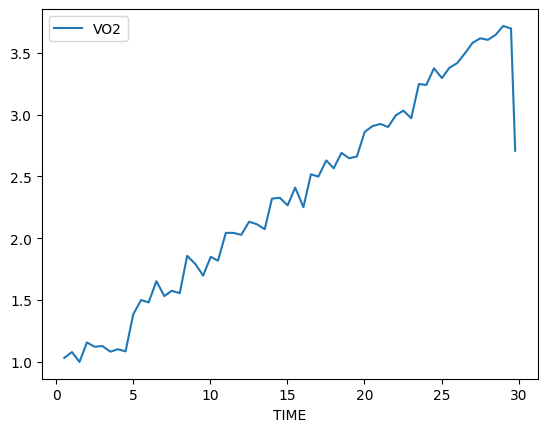

In [15]:
df.plot('TIME','VO2')

<Axes: xlabel='TIME'>

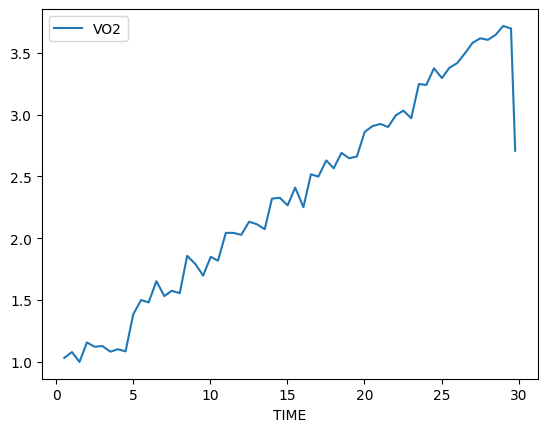

In [16]:
# Or column positions such as  0=TIME, 1=VO2, 2=VO2/kg, ...

df.plot(x=0, y=1)

Text(0, 0.5, 'L/min')

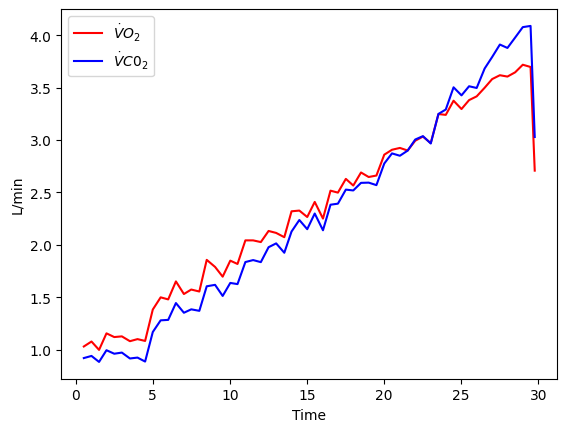

In [17]:
x = df['TIME']
y = df['VO2']
y1 = df['VCO2'] # second y plot
plt.plot(x, y, c= 'r', label = '$\dot VO_2$') # bracketing this in $ puts this into mathmode
# where you can create special characters and names _2 makes a subscript 2, 
# ^2 would make a superscript 2,
# \dot V  puts a dot over the V... this is defined in latex type.
plt.plot(x, y1, c='b', label='$\dot VC0_2$')
plt.legend()
plt.xlabel('Time')  # This creates a x axis label for the plot
plt.ylabel('L/min')  # This defines the y axix label for the plot

In [18]:
plt.savefig("V02-VC02.png", dpi=300, bbox_inches = "tight")

<Figure size 640x480 with 0 Axes>

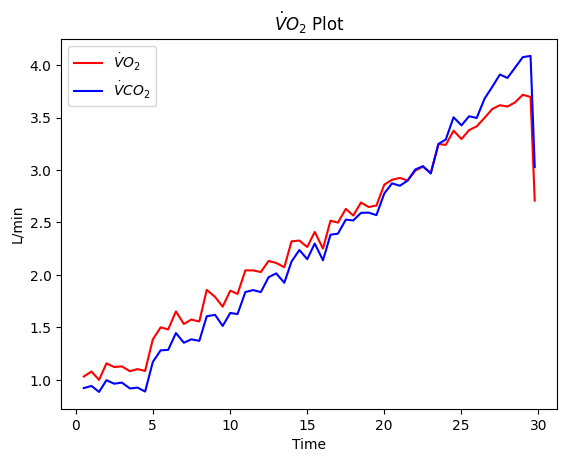

In [19]:
# import matplotlib.pyplot as plt we have already done this

# Assuming df['TIME'], df['VO2'], and df['VCO2'] are defined
x = df['TIME']
y = df['VO2']
y1 = df['VCO2']

# Create a figure and one subplot (ax) This allows us great flexibility with setting features
fig, ax = plt.subplots()

# Plot data on the ax object
ax.plot(x, y, c='r', label='$\dot{V}O_2$') # This is LaTeX math code that I am using for the legends
ax.plot(x, y1, c='b', label='$\dot{V}CO_2$')# Matplotlib has full support for LaTeX

# Add legend
ax.legend()

# Set x-axis and y-axis labels
ax.set_xlabel('Time')  # Set the x-axis label
ax.set_ylabel('L/min')  # Set the y-axis label, replace 'Value' with a descriptive term for your data
ax.set_title('$\dot{V}O_2$ Plot')
# If we want to save the figure we call this function before we "show" it as this might change the figure

# plt.savefig('VO2_plot.png', format='png', dpi=300, bbox_inches='tight')
plt.savefig('VO2_plot.png', format='png', dpi=300, bbox_inches='tight')
# we need to call the show function to render this to the screen we can avoid this step if we are processing many files at once.
plt.show() # this gets rid of the information on the top right of the plot and is a little higher quality

In [20]:
# simplify our terms to reduce future typing...
x = df['TIME']
y = df['VO2']
y1 = df['VE']

In [21]:
#Find VO2 max value 
ymax = max(y)

# find the x position of the ymax value or where ymax occurs on the x axis
xmax = x[y.argmax()]

In [22]:
print(ymax)
print(xmax)

3.718159437
29.00016212


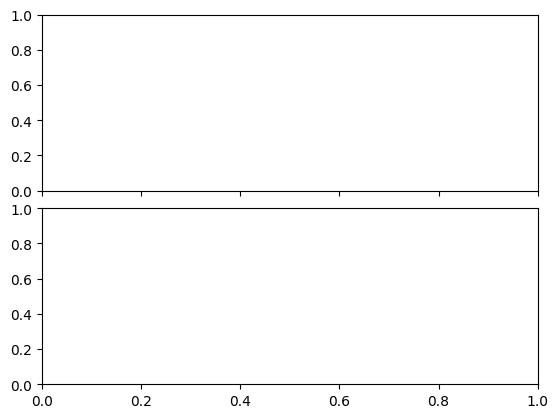

In [23]:
# break up the figure and axis definitions of a plot 
# so it is easier to assign values

fig, ax = plt.subplots(2, 1, sharex=True)

# create 2 subplots share x axis, in the next line we will remove 
# spaces between the horizontal axis, play with this value to see what happens the value can be 0.01 for example

fig.subplots_adjust(hspace=0.1
                   )

In [24]:
ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ 1),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )

Text(29.50016212, 4.718159437000001, '$\\dot VO_2max$ =(3.72) L/min')

In [25]:
ax[0].plot(x, y,  label=('$\dot VO_2$'), c='r' )
ax[0].spines[['right', 'top']].set_visible(False)
#note all these set features could be added in one line but reading it would be difficult
#ax.set(title = ('$\dot VO_2$'), label=('$\dot VO_2$ L/min'))  
ax[0].set(ylabel=('L/min'))
ax[0].legend()

In [26]:
# Second plot of values down from the top
ax[1].plot(x, y1, label=('VE'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('L/min'))
ax[1].legend()

In [27]:
fig.savefig("VO2-VE-3.png", dpi=300, bbox_inches = "tight")

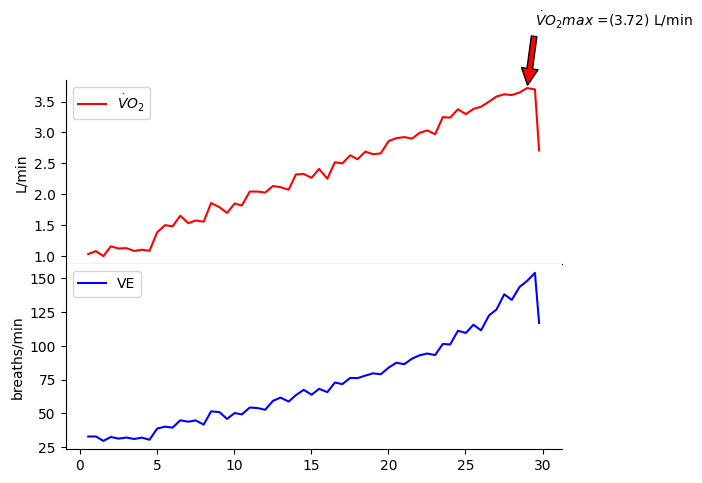

In [28]:
# break up the figure and axis definitions of a plot 
# so it is easier to assign values
fig, ax = plt.subplots(2, 1, sharex=True)  # Height increased from default
# spaces between the horizontal axis, play with this value?
fig.subplots_adjust(hspace=0)


ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ 1),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )

ax[0].plot(x, y,  label=('$\dot VO_2$'), c='r' )
ax[0].spines[['right', 'top']].set_visible(False)
#note all these set features could be added in one line but reading it would be difficult
#ax.set(title = ('$\dot VO_2$'), label=('$\dot VO_2$ L/min'))  
ax[0].set(ylabel=('L/min'))
ax[0].legend()

# Second plot of values down from the top
ax[1].plot(x, y1, label=('VE'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('breaths/min'))
ax[1].legend()

#ax[0].set_ylim(min(y) - 1, max(y) + 1)  # Adjust as needed for your data
#ax[1].set_ylim(min(y1) - 1, max(y1) + 1)  # Adjust as needed

# save the figure before we show it... or it will be blank
fig.savefig("VO2-VE-3.png", dpi=300, bbox_inches = "tight")
fig.show()

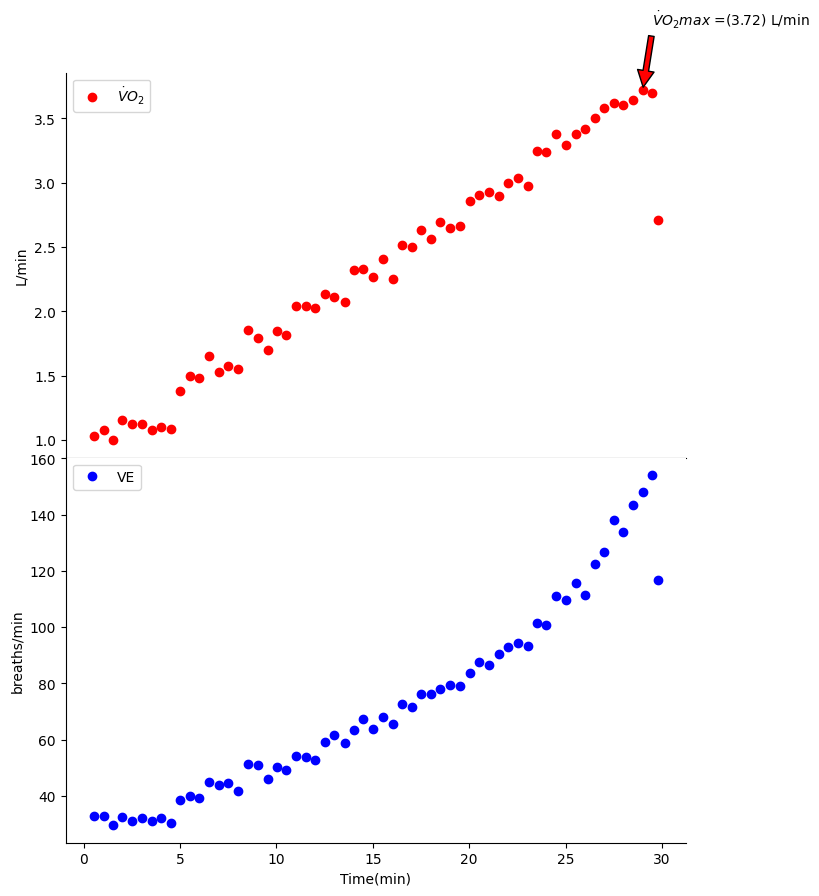

In [29]:
### Now all together in one code block that could run independently...
# lets take care of importing everything we need at once

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Lets read in our file now
df = pd.read_csv('../input/demo-knes381/subject_1432.csv', header=[0], skiprows=[1,2,3])

# please note that while this is an output file from the parvo-metabolics cart we have
# I have edited this data set and simplied the header file on it

# rename our column headers
df = df.rename(columns={'VE/': 'VE/VO2','VE/.1': 'VE/VCO2'})

# simplify our terms to reduce future typing... 
# it is easier to write plot x, y than plot df['Time'], df['VO2']
x = df['TIME']
y = df['VO2']
y1 = df['VE']

#Find VO2 max value 
ymax = max(y)

# find the x position of the ymax value or where ymax occurs on the x axis
xmax = x[y.argmax()]

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 10)) # Note I increased the figure size here.

# this line seperates the two plots...
fig.subplots_adjust(hspace=0)

# annotate the position of V02 max before plotting the value, we could do this later but why.

ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ .5),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )

ax[0].plot(x, y, 'o', label=('$\dot VO_2$'), c='r' )
# in the line of code below I hide the top and right black bars serrounding the plot for APA format.
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set(ylabel=('L/min'))
ax[0].legend()
#note all these set features could be added in one line but reading it would be difficult

# Second plot of values down from the top
ax[1].plot(x, y1, 'o', label=('VE'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('breaths/min'))
ax[1].set(xlabel=('Time(min)'))
ax[1].legend()

# save the figure before we show it... or it will be blank
fig.savefig("VO2-VE-4.png", dpi=300, bbox_inches = "tight")
fig.show()

In [30]:
# simplify our terms to reduce future typing...
x = df['VO2']
y = df['FECO2']
y1 = df['VCO2']

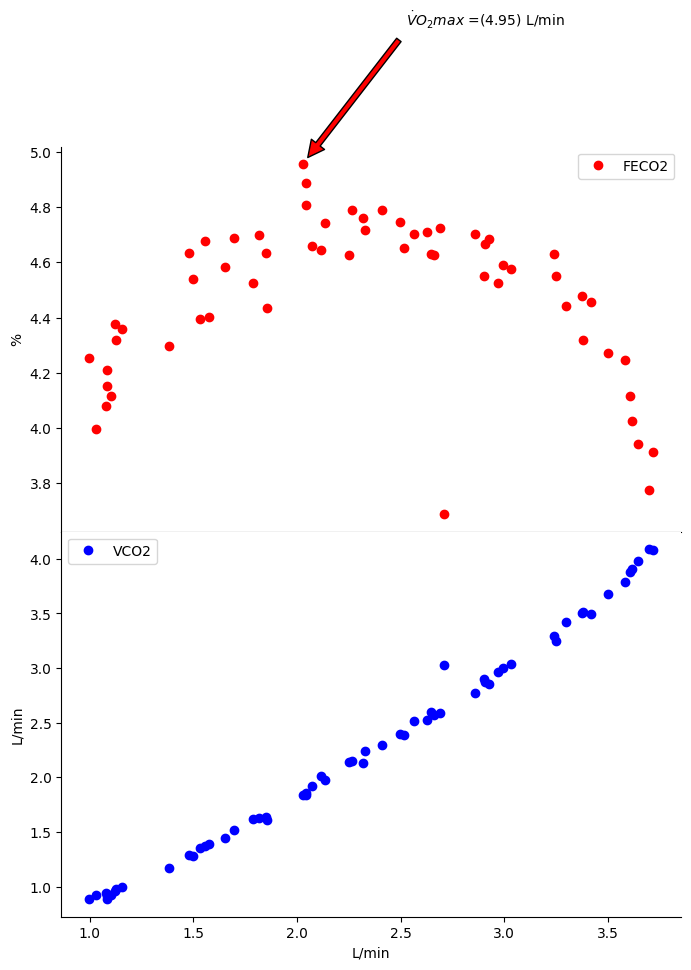

In [31]:
### Now all together in one code block that could run independently...
# lets take care of importing everything we need at once

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Lets read in our file now
df = pd.read_csv('../input/demo-knes381/subject_1432.csv', header=[0], skiprows=[1,2,3])

# please note that while this is an output file from the parvo-metabolics cart we have
# I have edited this data set and simplied the header file on it

# rename our column headers
df = df.rename(columns={'VE/': 'VE/VO2','VE/.1': 'VE/VCO2'})

# simplify our terms to reduce future typing... 
# it is easier to write plot x, y than plot df['Time'], df['VO2']
x = df['VO2']
y = df['FECO2']
y1 = df['VCO2']

#Find VO2 max value 
ymax = max(y)
# find the x position of the ymax value or where ymax occurs on the x axis
xmax = x[y.argmax()]

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 10)) # Note I increased the figure size here.

# this line seperates the two plots...
fig.subplots_adjust(hspace=0)

# annotate the position of V02 max before plotting the value, we could do this later but why.

ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ .5),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )

ax[0].plot(x, y, 'o', label=('FECO2'), c='r' )
# in the line of code below I hide the top and right black bars serrounding the plot for APA format.
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set(ylabel=('%'))
ax[0].legend()
#note all these set features could be added in one line but reading it would be difficult

# Second plot of values down from the top
ax[1].plot(x, y1, 'o', label=('VCO2'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('L/min'))
ax[1].set(xlabel=('L/min'))
ax[1].legend()

# save the figure before we show it... or it will be blank
fig.savefig("FECO2-VCO2-4.png", dpi=300, bbox_inches = "tight")
fig.show()